Projet 4 Réalisez une étude de santé publique avec R ou Python

Données à partir du site fao.org "Food and agriculture organization":
1. Population
2. Population en état de sous-nutrition
3. Disponibilité alimentaire
4. Aide alimentaire

Questions travaillées:
1. Determiner la proportion de la population en état de sous nutrition en 2017
2. Le nombre théorique de personnes qui pourraient être nourries.
3. Disponibilité alimentaire des produits végétaux
4. Trouver la formule de la Disponibilité alimentaire intérieure et  trouver la part de l'alimentation animale, des pertes et la part de l'alimentation humaine en %
5. Les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte (pour l'année 2017)
6. Les pays qui ont beneficié plus de l'aide depuis 2013
7. Les pays ayant le plus et le moins de disponibilité alimentaire par habitant
8. Manioc en Thailande 
9. Repartition de la production des céréales pour l'alimentation animale et humaine


In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import pandas as pd

In [3]:
data_population= pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/population.csv')

In [4]:
data_population.rename(columns={'Valeur': 'Valeur (milliers d habitants)'}, inplace=True)
display(data_population)

,Zone,Année,Valeur (milliers d habitants)
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113
...,...,...,...
1411,Zimbabwe,2014,13586.707
1412,Zimbabwe,2015,13814.629
1413,Zimbabwe,2016,14030.331
1414,Zimbabwe,2017,14236.595


In [5]:
data_nutrition= pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/sous_nutrition.csv')


In [6]:
data_nutrition.rename(columns={'Valeur': 'Valeur (millions d habitants)'}, inplace=True)
data_nutrition

,Zone,Année,Valeur (millions d habitants)
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5
...,...,...,...
1213,Zimbabwe,2013-2015,NaN
1214,Zimbabwe,2014-2016,NaN
1215,Zimbabwe,2015-2017,NaN
1216,Zimbabwe,2016-2018,NaN


In [7]:
data_dispo_alimentaire= pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/dispo_alimentaire.csv')
data_dispo_alimentaire

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,NaN,NaN,45.0,4.70,4.28,1.41,3.0,NaN,0.0,3.0,NaN,2.0,NaN,NaN,NaN
15601,Îles Salomon,Viande de Volailles,animale,NaN,NaN,11.0,3.34,0.69,1.14,2.0,NaN,2.0,2.0,NaN,0.0,NaN,NaN,NaN
15602,Îles Salomon,"Viande, Autre",animale,NaN,NaN,0.0,0.06,NaN,0.04,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15603,Îles Salomon,Vin,vegetale,NaN,NaN,0.0,0.07,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [8]:
data_aide_alimentaire=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/aide_alimentaire.csv')
data_aide_alimentaire.head(20)

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504
5,Afghanistan,2014,Céréales,15989
6,Afghanistan,2013,"Fruits secs, total",85
7,Afghanistan,2013,Huiles végétales,11087
8,Afghanistan,2014,Huiles végétales,8185
9,Afghanistan,2013,"Légumineuses Sèches,Tot.",11761


In [9]:
data_aide_alimentaire.groupby('Produit').sum('Valeur')

,Année,Valeur
Produit,,
Autres non-céréales,241685,48871
Blé et Farin,116813,1781515
BulgurFarEnt,48333,140547
Céréales,402813,4256884
Céréales Secondaires,122852,1166565
"Fruits secs, total",78563,9386
Graisses Com,2013,50
Huiles végétales,360509,344973
"Lait, total",46320,12478


In [10]:
# 1. La proportion de personnes en état de sous-nutrition
#Remplacement des valeurs d'interval des années par l'année qui est au milieu del'interval
data_nutrition['Année']=data_nutrition['Année'].replace({'2012-2014':2013,'2013-2015':2014,'2014-2016':2015,'2015-2017':2016, '2016-2018':2017, '2017-2019':2018})
#Remplacement de l'objet du type string ('<0.1') par la valeur 0 type integer pour pouvoir faire des opérations maths
data_nutrition['Valeur (millions d habitants)']=data_nutrition['Valeur (millions d habitants)'].replace({'<0.1':0})
#Changement du type de données de la colonne Valeur 
data_nutrition['Valeur (millions d habitants)'].astype(float)
#Calcul de la population en état de sous-nutrition
b= int(data_nutrition.loc[data_nutrition['Année']==2017, 'Valeur (millions d habitants)'].astype(float).sum()*1000000)
print('Le nombre de personnes dans le monde en état de sous nutrition en 2017:',b)

Le nombre de personnes dans le monde en état de sous nutrition en 2017: 535700000


In [11]:
#1 Proportion des gens en sous nutrition dans le monde en 2017
#Calcul de la population dans le monde en 2017
a= int(data_population.loc[data_population['Année']==2017,'Valeur (milliers d habitants)'].sum()*1000)
print('La population mondiale en 2017:',a)

La population mondiale en 2017: 7548134111


In [12]:
#1 Proportion des gens en sous nutrition dans le monde en 2017
#Calcul de la proportion de la population en état de sous nutrition en fonction de la population mondiale en 2017:

c= round(b/a*100, 2)
print('Pourcentage des gens dans le monde entier en état de sous nutrition en 2017 est:', c, '%')

Pourcentage des gens dans le monde entier en état de sous nutrition en 2017 est: 7.1 %


In [13]:
#2 Le nombre théorique de personnes qui pourraient être nourries.
#Regroupement de la disponibilité alimentaire par pays
data_dispo_alimentaire.groupby('Zone').sum('Disponibilité alimentaire (Kcal/personne/jour)')

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,
Afghanistan,768.0,415.0,2087.0,351.41,33.50,58.26,13515.0,278.0,2988.0,10735.0,1135.0,11171.0,395.0,63.0,-368.0
Afrique du Sud,5309.0,876.0,3020.0,564.80,83.58,85.33,61256.0,11674.0,7517.0,29812.0,2193.0,63263.0,253.0,22819.0,2153.0
Albanie,660.0,174.0,3188.0,1095.54,106.48,111.37,4758.0,94.0,933.0,3476.0,276.0,3964.0,55.0,113.0,-45.0
Algérie,4352.0,1707.0,3293.0,809.13,76.48,91.92,42630.0,655.0,17403.0,31729.0,3753.0,26359.0,449.0,637.0,-479.0
Allemagne,30209.0,7711.0,3503.0,957.52,141.62,101.39,162275.0,57431.0,65353.0,79238.0,3781.0,154547.0,1551.0,39842.0,-192.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,1174.0,2689.0,3275.0,700.24,87.16,104.51,11850.0,4343.0,15327.0,6548.0,705.0,1192.0,3.0,804.0,-327.0
Équateur,1200.0,1909.0,2346.0,544.91,94.64,61.30,18614.0,8002.0,1725.0,8574.0,707.0,24337.0,138.0,6200.0,557.0
États-Unis d'Amérique,148432.0,154699.0,3682.0,1002.39,161.37,109.42,777992.0,163524.0,81887.0,320889.0,7162.0,894668.0,10403.0,141010.0,-35032.0


In [14]:
#2 Le nombre théorique de personnes qui pourraient être nourries
#Vérification du nombre de pays du tableau population
data_population.loc[data_population['Année']==2017].count()

Zone                             236
Année                            236
Valeur (milliers d habitants)    236
dtype: int64

In [15]:
#2 Le nombre théorique de personnes qui pourraient être nourries
data_dispo_pop= pd.merge(data_population.loc[data_population['Année']==2017],data_dispo_alimentaire.groupby('Zone').sum('Disponibilité alimentaire (Kcal/personne/jour)'), on='Zone')
display(data_dispo_pop)
l= round((data_dispo_pop['Valeur (milliers d habitants)']*1000*data_dispo_pop['Disponibilité alimentaire (Kcal/personne/jour)']).sum()/2500/a*100, 2)
m= int((data_dispo_pop['Valeur (milliers d habitants)']*1000*data_dispo_pop['Disponibilité alimentaire (Kcal/personne/jour)']).sum()/2500)
print('Le nombre théorique de personnes qui pourraient être nourries dans le monde en 2017:', m, 'personnes')
print('ce que donne', l,'% de la population mondiale')

,Zone,Année,Valeur (milliers d habitants),Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,2017,36296.113,768.0,415.0,2087.0,351.41,33.50,58.26,13515.0,278.0,2988.0,10735.0,1135.0,11171.0,395.0,63.0,-368.0
1,Afrique du Sud,2017,57009.756,5309.0,876.0,3020.0,564.80,83.58,85.33,61256.0,11674.0,7517.0,29812.0,2193.0,63263.0,253.0,22819.0,2153.0
2,Albanie,2017,2884.169,660.0,174.0,3188.0,1095.54,106.48,111.37,4758.0,94.0,933.0,3476.0,276.0,3964.0,55.0,113.0,-45.0
3,Algérie,2017,41389.189,4352.0,1707.0,3293.0,809.13,76.48,91.92,42630.0,655.0,17403.0,31729.0,3753.0,26359.0,449.0,637.0,-479.0
4,Allemagne,2017,82658.409,30209.0,7711.0,3503.0,957.52,141.62,101.39,162275.0,57431.0,65353.0,79238.0,3781.0,154547.0,1551.0,39842.0,-192.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Venezuela (République bolivarienne du),2017,29402.484,2878.0,335.0,2633.0,652.86,82.44,72.96,32287.0,62.0,9604.0,19853.0,1190.0,23868.0,91.0,7957.0,-1130.0
168,Viet Nam,2017,94600.648,11356.0,3815.0,2744.0,574.84,72.11,81.61,95134.0,22638.0,9217.0,52700.0,6743.0,108275.0,1211.0,19311.0,278.0
169,Yémen,2017,27834.819,210.0,72.0,2217.0,375.41,47.81,58.90,9782.0,719.0,6786.0,9162.0,269.0,4125.0,67.0,39.0,-408.0
170,Zambie,2017,16853.599,408.0,69.0,1924.0,350.12,42.05,55.22,10041.0,675.0,380.0,5088.0,242.0,10526.0,76.0,4178.0,-182.0


Le nombre théorique de personnes qui pourraient être nourries dans le monde en 2017: 8367593850 personnes
ce que donne 110.86 % de la population mondiale


In [16]:
#3 Disponibilité alimentaire des produits végétaux

data_groupby_origine_zone= data_dispo_alimentaire.groupby(['Zone','Origine']).sum()
data_groupby_origine_zone= data_groupby_origine_zone.reset_index()
display(data_groupby_origine_zone)
data_dispo_pop_vege= pd.merge(data_groupby_origine_zone, data_population.loc[data_population['Année']==2017], on=['Zone'])
data_dispo_pop_vege= data_dispo_pop_vege.loc[data_dispo_pop_vege['Origine']=='vegetale']
n= round((data_dispo_pop_vege['Valeur (milliers d habitants)']*1000*data_dispo_pop_vege['Disponibilité alimentaire (Kcal/personne/jour)']).sum()/2500/a*100, 2)
o= int((data_dispo_pop_vege['Valeur (milliers d habitants)']*1000*data_dispo_pop_vege['Disponibilité alimentaire (Kcal/personne/jour)']).sum()/2500)
print('Nombre de personnes pourraient être nourries que par des produits végétaux dans le monde en 2017: ', o)
print('ce que donne ', n,'% de la population mondiale')


,Zone,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,animale,123.0,0.0,216.0,79.92,15.23,12.21,2631.0,0.0,350.0,2442.0,63.0,2280.0,2.0,0.0,0.0
1,Afghanistan,vegetale,645.0,415.0,1871.0,271.49,18.27,46.05,10884.0,278.0,2638.0,8293.0,1072.0,8891.0,393.0,63.0,-368.0
2,Afrique du Sud,animale,187.0,115.0,487.0,139.63,34.66,36.39,7817.0,1088.0,1049.0,7371.0,83.0,7614.0,67.0,0.0,241.0
3,Afrique du Sud,vegetale,5122.0,761.0,2533.0,425.17,48.92,48.94,53439.0,10586.0,6468.0,22441.0,2110.0,55649.0,186.0,22819.0,1912.0
4,Albanie,animale,101.0,2.0,985.0,389.05,67.72,59.41,1432.0,10.0,87.0,1235.0,94.0,1355.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,États-Unis d'Amérique,vegetale,145289.0,145102.0,2698.0,590.68,93.68,39.65,632023.0,140442.0,69522.0,189122.0,6937.0,740194.0,9030.0,140986.0,-37242.0
344,Éthiopie,animale,18.0,0.0,124.0,53.56,8.01,7.69,5190.0,23.0,17.0,5041.0,131.0,5195.0,5.0,0.0,0.0
345,Éthiopie,vegetale,667.0,3641.0,2005.0,300.99,17.88,52.70,38824.0,918.0,1694.0,28320.0,2125.0,40907.0,635.0,3443.0,-2857.0
346,Îles Salomon,animale,0.0,8.0,196.0,61.83,12.72,17.45,44.0,20.0,12.0,35.0,0.0,48.0,0.0,0.0,0.0


Nombre de personnes pourraient être nourries que par des produits végétaux dans le monde en 2017:  6904305684
ce que donne  91.47 % de la population mondiale


In [17]:
#4 La formule de la Disponibilité alimentaire intérieure=Production+Import-Export=Nourriture+Aliments pour les animaux+Semence+Pertes+Traitement+Autres utilisations
display(data_dispo_alimentaire.dropna(axis=0, how='any'))


,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
111,Afrique du Sud,Maïs,vegetale,4715.0,0.0,858.0,100.10,7.69,21.91,10480.0,3036.0,56.0,5283.0,405.0,11811.0,33.0,43.0,1650.0
128,Afrique du Sud,"Plantes Oleiferes, Autre",vegetale,0.0,1.0,0.0,0.00,0.00,0.00,16.0,17.0,4.0,0.0,0.0,23.0,0.0,14.0,7.0
204,Albanie,Maïs,vegetale,361.0,3.0,13.0,1.79,0.04,0.31,420.0,0.0,68.0,6.0,44.0,372.0,3.0,3.0,-20.0
214,Albanie,Orge,vegetale,7.0,1.0,1.0,0.16,0.00,0.03,19.0,0.0,14.0,1.0,1.0,7.0,0.0,9.0,-2.0
231,Albanie,Riz (Eq Blanchi),vegetale,0.0,0.0,68.0,7.78,0.16,1.34,25.0,0.0,25.0,25.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14768,Viet Nam,Riz (Eq Blanchi),vegetale,2712.0,1481.0,1390.0,144.56,4.60,28.34,21391.0,6951.0,2.0,13253.0,2703.0,29374.0,881.0,362.0,-1034.0
14923,Zambie,Maïs,vegetale,400.0,19.0,999.0,118.68,10.75,26.31,2293.0,176.0,6.0,1725.0,76.0,2533.0,30.0,42.0,-70.0
15071,Égypte,Blé,vegetale,4860.0,0.0,1175.0,146.83,6.27,35.62,19341.0,191.0,10331.0,12048.0,2224.0,9460.0,217.0,0.0,-260.0
15109,Égypte,Maïs,vegetale,7032.0,282.0,596.0,62.42,8.36,15.72,13802.0,7.0,5852.0,5122.0,1186.0,7957.0,32.0,148.0,0.0


In [18]:
#4 Trouver la part de l'alimentation animale, des pertes et la part de l'alimentation humaine en %

h= data_dispo_alimentaire['Disponibilité intérieure'].sum()
i= round(data_dispo_alimentaire['Aliments pour animaux'].sum()/h*100, 2)
j= round(data_dispo_alimentaire['Nourriture'].sum()/h*100, 2)
k= round(data_dispo_alimentaire['Pertes'].sum()/h*100, 2)
print('Disponibilité intérieure mondiale (milliers de tonnes):',h)
print('Les parts de la disponibilité intérieure:')
print(' Aliments pour les animaux:',i,'%\n','Nourriture humaine:',j,'%\n','Pertes:',k,'%\n','Autre:',100-j-k-i,'%')


Disponibilité intérieure mondiale (milliers de tonnes): 9848994.0
Les parts de la disponibilité intérieure:
 Aliments pour les animaux: 13.24 %
 Nourriture humaine: 49.51 %
 Pertes: 4.61 %
 Autre: 32.64 %


([<matplotlib.patches.Wedge at 0x7f5dd023f0d0>,
 [Text(-1.0564942808067594, 0.30630023607990964, 'aliments pour les animaux'),
  Text(0.12990112480021704, -1.0923029331534537, 'nourriture humaine'),
  Text(1.066399331154096, 0.26980079042526334, 'pertes'),
  Text(0.1673738425298896, 1.0871917939520974, 'autre')],
 [Text(-0.5762696077127778, 0.16707285604358704, '13.2%'),
  Text(0.07085515898193655, -0.5958015999018839, '49.5%'),
  Text(0.5816723624476887, 0.14716406750468908, '4.6%'),
  Text(0.0912948231981216, 0.5930137057920531, '32.6%')])

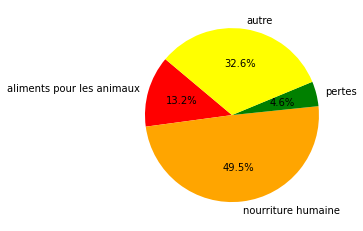

In [19]:
#4 Representer en graphique
import matplotlib.pyplot as plt
my_array=[i,j,k,100-i-j-k]
labels=['aliments pour les animaux','nourriture humaine','pertes','autre']
colors = ["red", "orange", "green", "yellow"]
plt.pie(my_array, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)

In [20]:
#5 Les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte (pour l'année 2017)

data_sous_nutrition_pays= pd.merge(data_nutrition.loc[data_nutrition['Année']== 2017], data_population.loc[data_population['Année']== 2017], on='Zone')
data_sous_nutrition_pays.rename(columns={'Valeur (millions d habitants)': 'Population en etat de sous-nutrition (millions d habitants)','Valeur (milliers d habitants)': 'Population totale (milliers d habitants)'}, inplace=True)
data_sous_nutrition_pays['taux_sous_nutrition']= data_sous_nutrition_pays['Population en etat de sous-nutrition (millions d habitants)'].astype(float)*1000/data_sous_nutrition_pays['Population totale (milliers d habitants)']*100
display(data_sous_nutrition_pays.sort_values('taux_sous_nutrition', ascending=False).head(20))


,Zone,Année_x,Population en etat de sous-nutrition (millions d habitants),Année_y,Population totale (milliers d habitants),taux_sous_nutrition
78,Haïti,2017,5.3,2017,10982.366,48.259182
157,République populaire démocratique de Corée,2017,12,2017,25429.825,47.188685
108,Madagascar,2017,10.5,2017,25570.512,41.062924
103,Libéria,2017,1.8,2017,4702.226,38.279742
100,Lesotho,2017,0.8,2017,2091.534,38.249438
183,Tchad,2017,5.7,2017,15016.753,37.957606
161,Rwanda,2017,4.2,2017,11980.961,35.055619
121,Mozambique,2017,9.4,2017,28649.018,32.810898
186,Timor-Leste,2017,0.4,2017,1243.258,32.173531
0,Afghanistan,2017,10.5,2017,36296.113,28.928718


In [21]:
#6 Les pays qui ont beneficié plus de l'aide depuis 2013
gb = data_aide_alimentaire.groupby(['Pays bénéficiaire'])
result = pd.DataFrame({
             'somme de la colonne Valeur' : gb['Valeur'].sum(),    
             'année' : gb['Année'].first(),          
})
result.sort_values('somme de la colonne Valeur', ascending=False).head(20)

,somme de la colonne Valeur,année
Pays bénéficiaire,,
République arabe syrienne,1858943,2013
Éthiopie,1381294,2013
Yémen,1206484,2013
Soudan du Sud,695248,2013
Soudan,669784,2014
Kenya,552836,2014
Bangladesh,348188,2013
Somalie,292678,2013
République démocratique du Congo,288502,2013


In [22]:
#7-1 Les pays ayant le plus de disponibilité alimentaire par habitant
data_dispo_alimentaire= data_dispo_alimentaire.groupby('Zone').sum('Disponibilité alimentaire (Kcal/personne/jour)')
data_dispo_alimentaire.sort_values('Disponibilité alimentaire (Kcal/personne/jour)', ascending=False).head(10)

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,
Autriche,3412.0,1001.0,3770.0,1069.20,170.44,106.20,19308.0,6733.0,8463.0,9085.0,459.0,18129.0,173.0,5178.0,-556.0
Belgique,5533.0,3226.0,3737.0,1002.09,161.95,99.37,29358.0,30345.0,35276.0,11134.0,564.0,24496.0,153.0,8960.0,-64.0
Turquie,17750.0,3006.0,3708.0,968.15,119.64,108.12,131377.0,14593.0,12136.0,72551.0,12036.0,137432.0,2553.0,23560.0,-3599.0
États-Unis d'Amérique,148432.0,154699.0,3682.0,1002.39,161.37,109.42,777992.0,163524.0,81887.0,320889.0,7162.0,894668.0,10403.0,141010.0,-35032.0
Israël,2525.0,801.0,3610.0,922.14,151.39,128.00,11267.0,1648.0,5883.0,7132.0,220.0,6906.0,71.0,564.0,128.0
Irlande,3758.0,1120.0,3602.0,1150.15,125.69,109.91,10738.0,6828.0,6254.0,5320.0,236.0,11501.0,89.0,399.0,-192.0
Italie,16144.0,3228.0,3578.0,993.20,154.69,108.49,97405.0,23643.0,38692.0,60584.0,1861.0,80855.0,736.0,14870.0,1496.0
Luxembourg,147.0,11.0,3540.0,1150.66,141.49,113.64,802.0,821.0,1076.0,607.0,11.0,593.0,9.0,24.0,-41.0
Égypte,15084.0,2262.0,3518.0,803.79,63.09,103.22,115133.0,5014.0,24100.0,65957.0,7608.0,95848.0,1365.0,22924.0,199.0


In [23]:
#7-2 Les pays ayant le moins de disponibilité alimentaire par habitant
data_dispo_alimentaire.sort_values('Disponibilité alimentaire (Kcal/personne/jour)', ascending=True).head(10)

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,
République centrafricaine,1.0,27.0,1879.0,453.73,59.41,46.04,2582.0,0.0,76.0,2092.0,122.0,2503.0,63.0,278.0,3.0
Zambie,408.0,69.0,1924.0,350.12,42.05,55.22,10041.0,675.0,380.0,5088.0,242.0,10526.0,76.0,4178.0,-182.0
Madagascar,842.0,2522.0,2056.0,425.07,24.49,46.69,15216.0,236.0,924.0,9741.0,966.0,14160.0,375.0,844.0,375.0
Afghanistan,768.0,415.0,2087.0,351.41,33.50,58.26,13515.0,278.0,2988.0,10735.0,1135.0,11171.0,395.0,63.0,-368.0
Haïti,481.0,115.0,2089.0,397.78,48.92,47.70,6175.0,15.0,1204.0,4101.0,679.0,5072.0,36.0,762.0,-77.0
République populaire démocratique de Corée,816.0,695.0,2093.0,458.93,36.41,54.99,14876.0,83.0,993.0,11425.0,1066.0,13883.0,194.0,678.0,84.0
Tchad,104.0,2.0,2109.0,319.45,47.10,62.75,5304.0,0.0,290.0,4097.0,459.0,5153.0,101.0,542.0,-141.0
Zimbabwe,131.0,23.0,2113.0,336.59,57.18,48.32,9507.0,278.0,1342.0,4762.0,188.0,7914.0,76.0,4330.0,531.0
Ouganda,348.0,68.0,2126.0,535.58,46.57,52.64,26624.0,1218.0,1257.0,20121.0,991.0,26321.0,154.0,4982.0,269.0


In [24]:
#8 Manioc en Thailande Proportion de personnes en état de sous nutrition <==> export <==> production
data_cereales= pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/FAOSTAT_data_fr_2-6-2023.csv') 
#display(data_cereales)
display(data_cereales.loc[(data_cereales['Zone']=='Thaïlande') & (data_cereales['Produit']=='Manioc et produits')])
display(data_sous_nutrition_pays.loc[data_sous_nutrition_pays['Zone']=='Thaïlande'])
taux_sousnutri_thai= data_sous_nutrition_pays.loc[data_sous_nutrition_pays['Zone']=='Thaïlande', 'taux_sous_nutrition'].sum()
w= data_cereales.loc[(data_cereales['Zone']=='Thaïlande') & (data_cereales['Produit']=='Manioc et produits') & (data_cereales['Élément']=='Exportations - Quantité'), 'Valeur']
display(w.iloc[0])
v= data_cereales.loc[(data_cereales['Zone']=='Thaïlande') & (data_cereales['Produit']=='Manioc et produits') & (data_cereales['Élément']=='Production'), 'Valeur']
taux_export= w.iloc[0]*100/v.iloc[0]
print('Le taux de la population en état de sous-nutrition qui s élève jusqu à ',round(taux_sousnutri_thai, 2),'% en Thailande, malgré ça le taux de l exportation de la manioc est assez important:',taux_export, '%')


,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit (CPC),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
8200,FBS,Bilans Alimentaires (2010-),764,Thaïlande,5511,Production,S2532,Manioc et produits,2017,2017,Milliers de tonnes,30495,I,Valeur imputée
8201,FBS,Bilans Alimentaires (2010-),764,Thaïlande,5611,Importations - Quantité,S2532,Manioc et produits,2017,2017,Milliers de tonnes,2355,I,Valeur imputée
8202,FBS,Bilans Alimentaires (2010-),764,Thaïlande,5911,Exportations - Quantité,S2532,Manioc et produits,2017,2017,Milliers de tonnes,29409,I,Valeur imputée
8203,FBS,Bilans Alimentaires (2010-),764,Thaïlande,5301,Disponibilité intérieure,S2532,Manioc et produits,2017,2017,Milliers de tonnes,4757,I,Valeur imputée
8204,FBS,Bilans Alimentaires (2010-),764,Thaïlande,5521,Aliments pour animaux,S2532,Manioc et produits,2017,2017,Milliers de tonnes,1360,I,Valeur imputée
8205,FBS,Bilans Alimentaires (2010-),764,Thaïlande,5142,Nourriture,S2532,Manioc et produits,2017,2017,Milliers de tonnes,153,I,Valeur imputée


,Zone,Année_x,Population en etat de sous-nutrition (millions d habitants),Année_y,Population totale (milliers d habitants),taux_sous_nutrition
185,Thaïlande,2017,6.2,2017,69209.81,8.958268


29409

Le taux de la population en état de sous-nutrition qui s élève jusqu à  8.96 % en Thailande, malgré ça le taux de l exportation de la manioc est assez important: 96.4387604525332 %


In [25]:
#9 La liste des céréales? Alimentation humaine et animale
#display(data_cereales.head(20))
data_cereales_groupby= data_cereales.groupby(['Produit','Élément']).sum('Valeur')
data_cereales_groupby= data_cereales_groupby.reset_index()
data_cereales_groupby= data_cereales_groupby.loc[(data_cereales_groupby['Élément']=='Nourriture') | (data_cereales_groupby['Élément']=='Aliments pour animaux'), ['Produit','Élément','Valeur']]
#display(data_cereales_groupby)
data_cereales_groupby= data_cereales_groupby.pivot_table(index='Produit', columns= 'Élément', values='Valeur')
display(data_cereales_groupby)
z= data_cereales_groupby['Aliments pour animaux'].sum()
y= data_cereales_groupby['Nourriture'].sum()
x=y+z
print("La répartition de la production mondiale des céréales en 2017 est", round(z/x*100, 2),"% pour l'alimentation des animaux et ", round(y/x*100, 2), "% pour l'alimentation humaine.")


Élément,Aliments pour animaux,Nourriture
Produit,,
Avoine,17185,4813
Blé et produits,141401,604077
"Céréales, Autres",20544,7588
Manioc et produits,109689,149579
Maïs et produits,813924,148099
Millet et produits,4594,22413
Orge et produits,88726,8125
Riz et produits,42663,772058
Seigle et produits,6515,4539


La répartition de la production mondiale des céréales en 2017 est 42.0 % pour l'alimentation des animaux et  58.0 % pour l'alimentation humaine.
